In [3]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
from neuron.units import ms, mV, um
h.load_file('stdrun.hoc') 

1.0

In [4]:
axon = h.Section(name='axon')
axon.L = 20000 * um
axon.diam = 10 * um
axon.nseg = 1001
axon.Ra = 160
axon.cm = 1
axon.insert(h.hh)
axon.insert(h.extracellular)

for seg in axon:
    seg.hh.gnabar = 0.12
    seg.hh.gkbar = 0.036
    seg.hh.gl = 3e-4
    seg.hh.el = -54.3
    seg.xraxial[0] = 1e9
    seg.xraxial[1] = 1e9
    seg.xg[0] = 1e9
    seg.xg[1] = 1e9
    seg.xc[0] = 0
    seg.xc[1] = 0
    seg.e_extracellular = 0

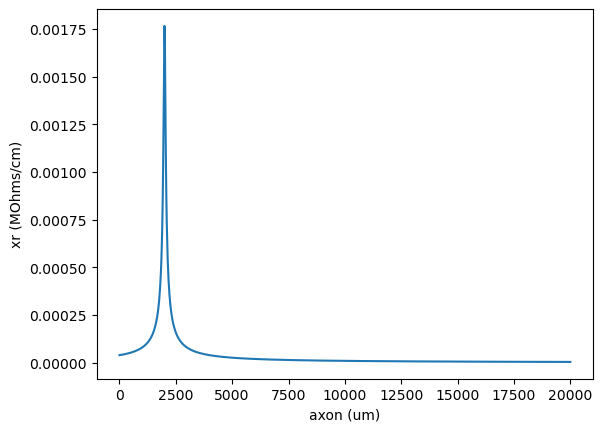

In [5]:
axn_x = np.linspace(0, 1, 1002) * axon.L
axn_y = np.zeros(1002) * um
axn_z = np.ones(1002) * 0.5 * axon.diam

src_x = np.ones(1002) * 0.1 * axon.L
src_y = np.zeros(1002) * um
src_z = np.ones(1002) * 50 * um

r = np.sqrt((axn_x-src_x)**2+(axn_y-src_y)**2+(axn_z-src_z)**2)
rho = 1
xr = rho/(4*np.pi*r)

fig,ax = plt.subplots()
ax.plot(axn_x, xr)
ax.set_xlabel('axon (um)')
ax.set_ylabel('xr (MOhms/cm)')
plt.show()

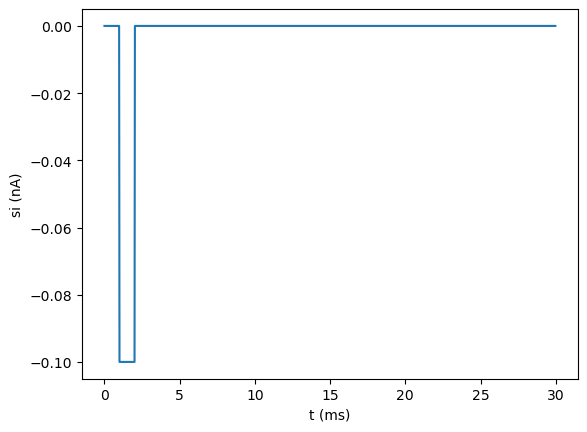

In [6]:
delay = 1 * ms
dur = 1 * ms
amp = -0.1

t = np.arange(0 * ms, 30 * ms, 0.025 * ms)
si = np.where((t >= delay) & (t <= delay + dur), amp, 0)

fig, ax = plt.subplots()
ax.plot(t, si)
ax.set_xlabel('t (ms)')
ax.set_ylabel('si (nA)')
plt.show()

In [7]:
tvec = h.Vector(t)
for idx, seg in enumerate(axon):
    sivec = h.Vector(si*xr[idx]*1e6)
    sivec.play(seg._ref_e_extracellular, tvec, True)

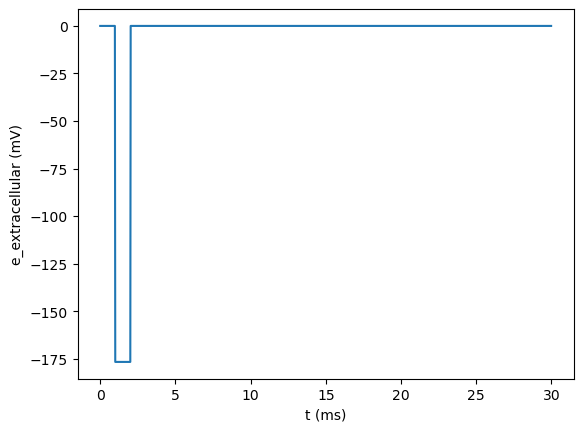

In [8]:
tvec = h.Vector(t)
sivec = h.Vector(si*xr[100]*1e6)

fig, ax = plt.subplots()
ax.plot(tvec, sivec)
ax.set_xlabel('t (ms)')
ax.set_ylabel('e_extracellular (mV)')
plt.show()

In [9]:
trec = h.Vector().record(h._ref_t)
# vrec = h.Vector().record(axon(0.9)._ref_v)
vrec = h.Vector().record(axon(0.1)._ref_vext[0])


In [10]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

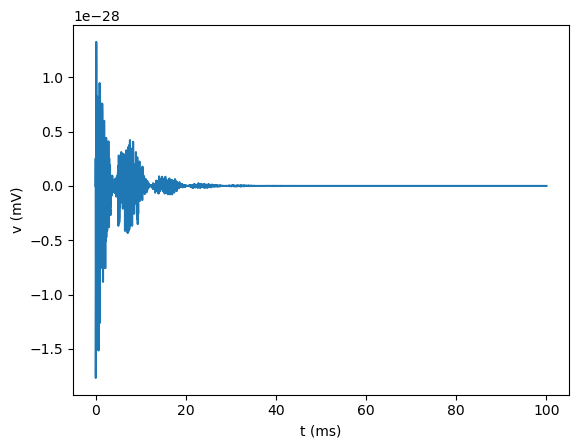

In [11]:
fig, ax = plt.subplots()
ax.plot(trec, vrec)
ax.set_xlabel('t (ms)')
ax.set_ylabel('v (mV)')
plt.show()